In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
ENERGY = np.logspace(-1,1,50)

### Set up IPython Parallel

First, I had to start a cluster on my machine

    $ ipcluster start --n=4



In [4]:
import os
from ipyparallel import Client

In [5]:
rc = Client()
ar = rc[:]

In [6]:
def calc_tau_scat( energy ):
    import numpy as np
    import dust
    import sigma_scat as ss
    
    AMIN, AMAX = 0.005, 0.25 # microns
    NA  = 50  # number of points to use to sample distribution
    RHO = 3.8 # grain density (g cm^-3)
    P   = 3.5 # power law slope
    MDUST  = 1.e22 * dust.c.mp() * 0.009  # magic numbers (dust mass per 10^22 H)
    
    mrn = dust.Dustdist( rad=np.linspace(AMIN,AMAX,NA), rho=RHO, p=P )
    result = ss.Kappascat( E=energy, dist=dust.Dustspectrum(rad=mrn), 
                           scatm=ss.makeScatmodel('Mie','Silicate') )

    return result.kappa * MDUST

In [7]:
base_result = ar.map(calc_tau_scat, ENERGY)

In [12]:
base_result.ready()

True

In [13]:
tau_scat = np.array([b[0] for b in base_result])

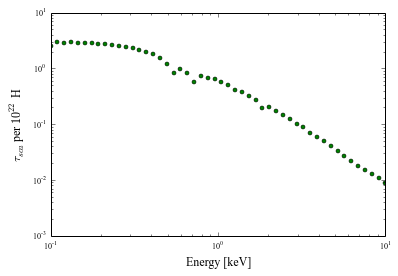

In [14]:
plt.plot(ENERGY, tau_scat, 'go')
plt.loglog()
plt.xlabel('Energy [keV]')
plt.ylabel(r'$\tau_{sca}$ per $10^{22}$ H')